In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
# Load the dataset
file_path = 'cleaned_dataset_savethestray.csv'  # Update the path if needed
dataset = pd.read_csv(file_path)

# Remove the risk_category column
dataset = dataset.drop(columns=['risk_category'])

In [5]:
# Separate features and target variable
X = dataset.drop(columns=['risk_score'])
y = dataset['risk_score']

In [9]:
# One-hot encoding for categorical features
categorical_features = ['time_of_day', 'weather', 'area_type', 'traffic_level']
encoder = OneHotEncoder(sparse_output=False)  # Updated argument
X_encoded = encoder.fit_transform(X[categorical_features])

# Standardize numerical features
numerical_features = ['latitude', 'longitude', 'animal_sightings']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_features])

# Combine preprocessed categorical and numerical features
X_preprocessed = np.hstack((X_scaled, X_encoded))

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Define the deep learning model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define the input shape here
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')  # Linear activation for regression
])

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [21]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0665 - mean_absolute_error: 0.1966 - val_loss: 0.0161 - val_mean_absolute_error: 0.0993
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0193 - mean_absolute_error: 0.1096 - val_loss: 0.0132 - val_mean_absolute_error: 0.0908
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0147 - mean_absolute_error: 0.0965 - val_loss: 0.0138 - val_mean_absolute_error: 0.0931
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0121 - mean_absolute_error: 0.0869 - val_loss: 0.0103 - val_mean_absolute_error: 0.0798
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0103 - mean_absolute_error: 0.0803 - val_loss: 0.0090 - val_mean_absolute_error: 0.0741
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0093 - mean_absolute_error: 0.0756 - val_loss: 0.0076 - val_mean_absolute_error: 0.0692
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0084 - mean_absolute_error: 0.0715 - v

In [23]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}, Test Mean Absolute Error: {mae}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - mean_absolute_error: 0.0494
Test Loss: 0.004047454334795475, Test Mean Absolute Error: 0.048848967999219894


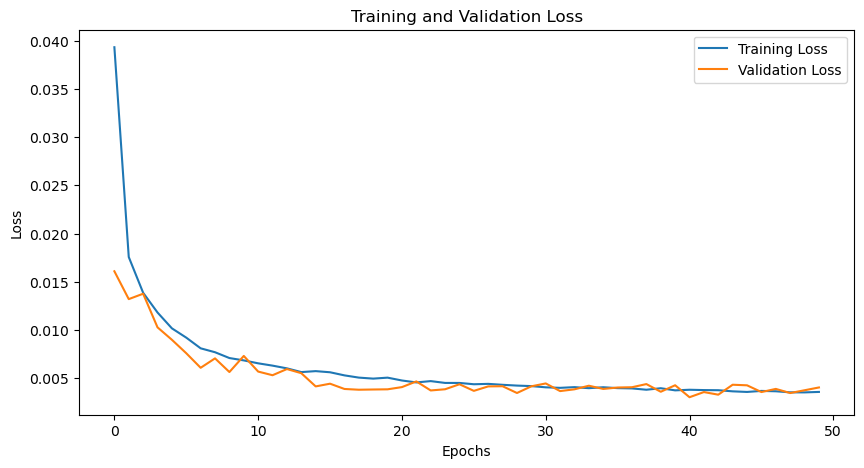

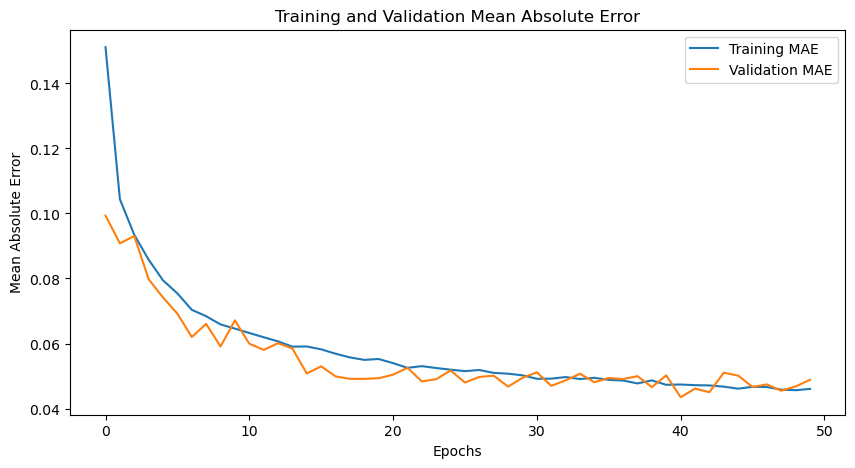

In [25]:
# Visualize training history
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation mean absolute error
plt.figure(figsize=(10, 5))
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()